In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd

In [2]:
#creating engine
engine = create_engine('postgresql://postgres:PW@localhost:5432/sql-challenge')

In [3]:
#checking the name of tables
inspector = inspect(engine)
inspector.get_table_names()

['departments', 'dept_emp', 'salaries', 'titles', 'employees', 'dept_manager']

In [4]:
#reflect database
Base = automap_base()
Base.prepare(engine, reflect=True)
salaries = Base.classes.salaries
employees = Base.classes.employees
session = Session(engine)

In [5]:
#display results
results = session.query(salaries.emp_no, salaries.salary).all()
results

[('10001', 60117),
 ('10002', 65828),
 ('10003', 40006),
 ('10004', 40054),
 ('10005', 78228),
 ('10006', 40000),
 ('10007', 56724),
 ('10008', 46671),
 ('10009', 60929),
 ('10010', 72488),
 ('10011', 42365),
 ('10012', 40000),
 ('10013', 40000),
 ('10014', 46168),
 ('10015', 40000),
 ('10016', 70889),
 ('10017', 71380),
 ('10018', 55881),
 ('10019', 44276),
 ('10020', 40000),
 ('10021', 55025),
 ('10022', 40000),
 ('10023', 47883),
 ('10024', 83733),
 ('10025', 40000),
 ('10026', 47585),
 ('10027', 40000),
 ('10028', 48859),
 ('10029', 63163),
 ('10030', 66956),
 ('10031', 40000),
 ('10032', 48426),
 ('10033', 51258),
 ('10034', 47561),
 ('10035', 41538),
 ('10036', 42819),
 ('10037', 40000),
 ('10038', 40000),
 ('10039', 40000),
 ('10040', 52153),
 ('10041', 56893),
 ('10042', 81662),
 ('10043', 49324),
 ('10044', 40919),
 ('10045', 41971),
 ('10046', 40000),
 ('10047', 54982),
 ('10048', 40000),
 ('10049', 40000),
 ('10050', 74366),
 ('10051', 48817),
 ('10052', 57212),
 ('10053', 6

In [6]:
#create DF
df = pd.DataFrame(results, columns=['emp_no', 'salary'])
df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
#separate into bins
bins = [0, 40000, 60000, 80000, 100000, 10000000]
group_names = ["0 to 40k", "40 to 60k", "60 to 80k", "80 to 100k", "100k or more"]
df["salary_summary"] = pd.cut(df["salary"], bins, labels=group_names, include_lowest=True)
df

,emp_no,salary,salary_summary
0,10001,60117,60 to 80k
1,10002,65828,60 to 80k
2,10003,40006,40 to 60k
3,10004,40054,40 to 60k
4,10005,78228,60 to 80k
...,...,...,...
300019,499995,40000,0 to 40k
300020,499996,58058,40 to 60k
300021,499997,49597,40 to 60k
300022,499998,40000,0 to 40k


In [8]:
#create salary df
salary_df = df[["salary_summary", "salary"]]
graph = salary_df.groupby("salary_summary").count()
graph

,salary
salary_summary,
0 to 40k,95346
40 to 60k,121043
60 to 80k,66219
80 to 100k,16129
100k or more,1287


Text(0, 0.5, 'Number of Employees')

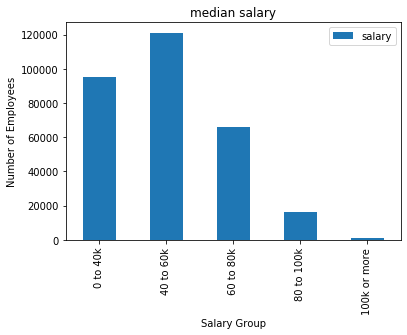

In [9]:
#graph
graph1 = graph.plot(kind = "bar", title="median salary")
graph1.set_xlabel("Salary Group")
graph1.set_ylabel("Number of Employees")


In [10]:
#selected data by using join and groupby
results1 = engine.execute('select titles.title, avg(sal.salary) from employees emp join salaries sal on emp.emp_no = sal.emp_no join titles on emp.title_id = titles.title_id group by titles.title').fetchall()
results1



[('Assistant Engineer', Decimal('48564.434447300771')),
 ('Engineer', Decimal('48535.336511426337')),
 ('Manager', Decimal('51531.041666666667')),
 ('Senior Engineer', Decimal('48506.799871095788')),
 ('Senior Staff', Decimal('58550.172704359929')),
 ('Staff', Decimal('58465.382850331521')),
 ('Technique Leader', Decimal('48582.896091893319'))]

In [11]:
#replace tuples to list and make a DF
title = pd.DataFrame([result[0] for result in results1])

titledf = title.rename(columns={0:"Title"})
titledf["Salary"] = [int(result[1]) for result in results1]
titledf


,Title,Salary
0,Assistant Engineer,48564
1,Engineer,48535
2,Manager,51531
3,Senior Engineer,48506
4,Senior Staff,58550
5,Staff,58465
6,Technique Leader,48582


Text(0, 0.5, 'Average Salary')

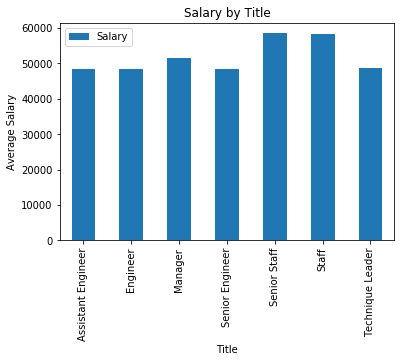

In [12]:
graph2 = titledf.plot(kind = "bar", title="Salary by Title")
graph2.set_xticklabels(titledf["Title"])
graph2.set_xlabel("Title")
graph2.set_ylabel("Average Salary")
